# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [3]:
df.pop('customerID')

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Exploratory Data Analytics

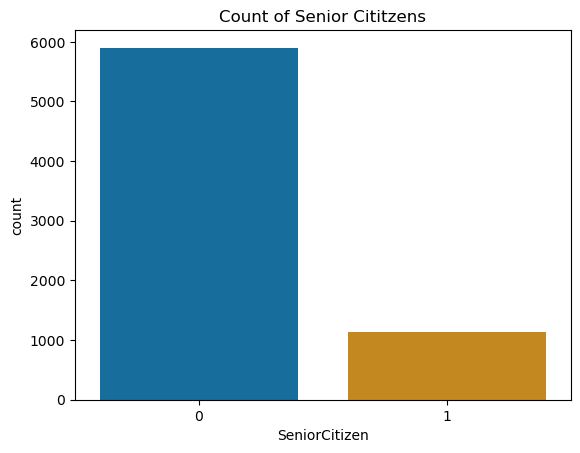

In [6]:
sns.set_palette('colorblind')
ax = sns.countplot(x="SeniorCitizen", data=df)
plt.title("Count of Senior Cititzens")
plt.show()

Majority of our subsribers are young people, only about 1500 senior citizens are a part of our subscribers. Therefore we must focus more on the neeeds of the young generation, which maybe providing better internet quality or the quantity of internet provided with any particular pack can be increased, in order to attract more customers and since the audience is young so it'll be easier to attract them via social media marketing or by getting brand ambassadors.

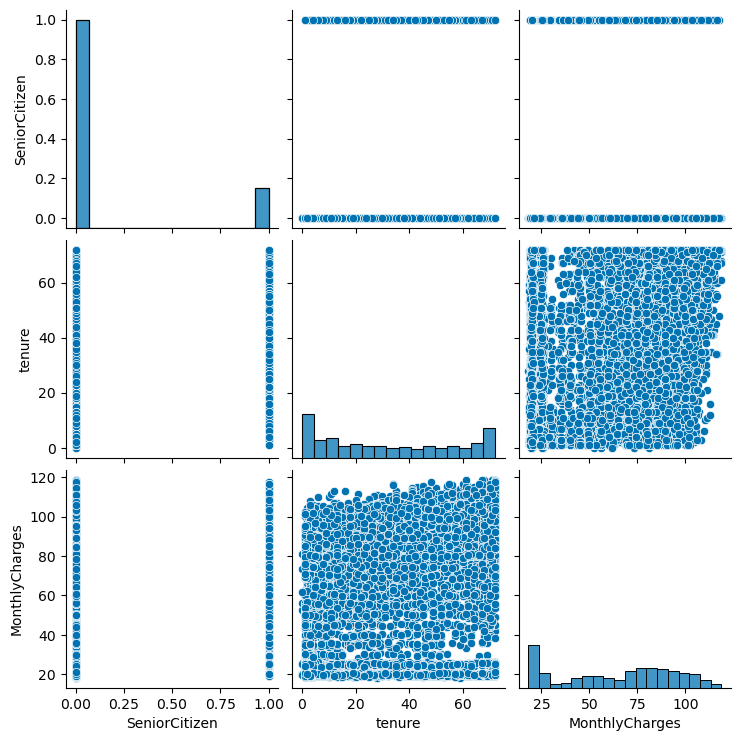

In [47]:
sns.pairplot(df)

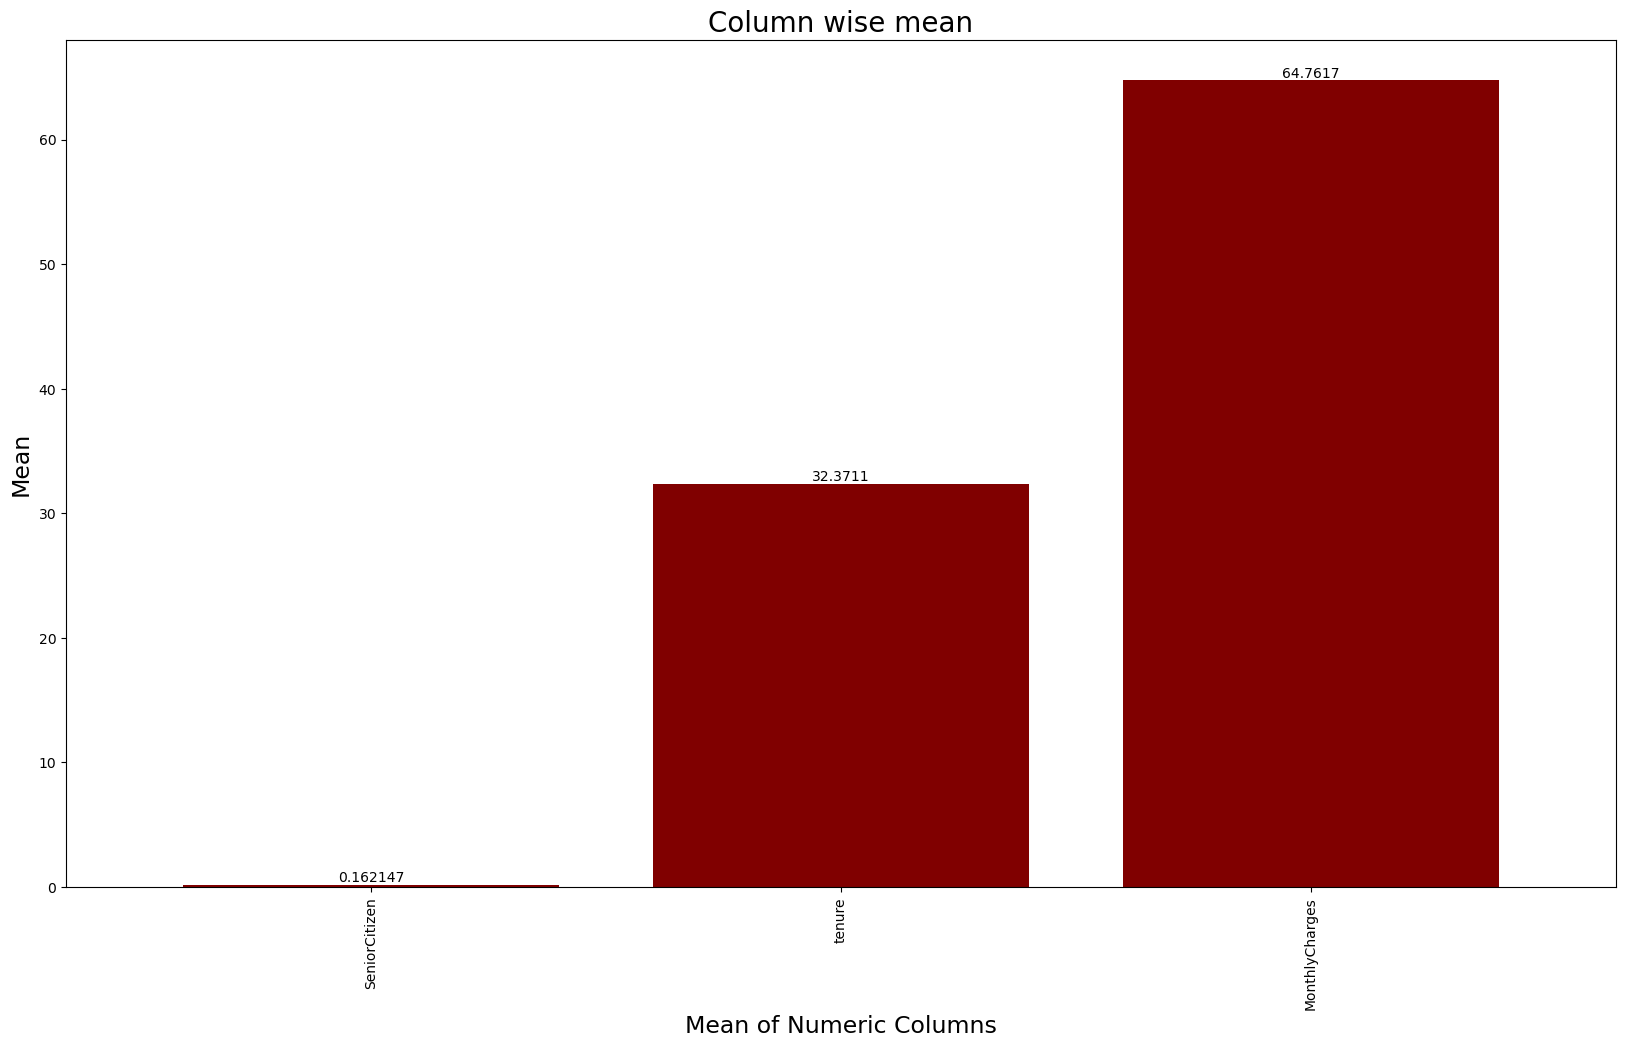

In [48]:
plt.figure(figsize = (20, 11))
ax = df.describe().loc["mean"].plot.bar(color ='maroon',width = 0.8)
ax.set_xlabel(xlabel = 'Mean of Numeric Columns', fontsize = 17)
ax.set_ylabel(ylabel = 'Mean', fontsize = 17)
ax.set_title(label = 'Column wise mean', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

According to the graph mentioned above, we can easily see the mean amount of payment 64.7617 done on the monthly basis, the payment seems rather low looking at the services being provided, now this could either be due to the lack of services provided or the poor weather conditions in the area heavily affecting the connections. Therefore, the company must urgently work on the external factors affecting the services, in ordeer to increase the quality so that people are satisfied with the services provided and subscribe to other services as well.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

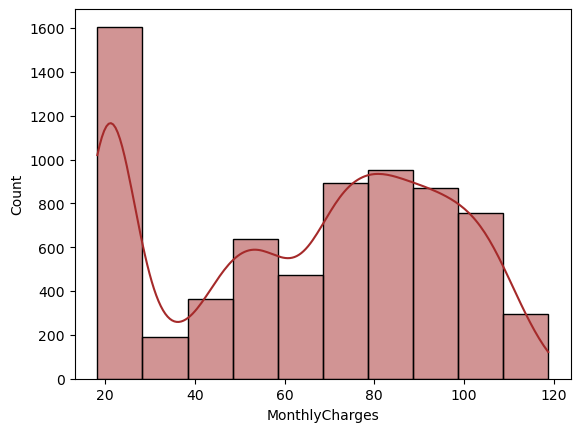

In [52]:
sns.histplot(data=df['MonthlyCharges'], bins=10, color="brown", kde=True)

As mentioned in the above interpretation, we must work on the quality oof the services provided and, we must look into the security part of the services, because this might be a major factor as to why people prefer other network providers over our company. Secondly, if there is a certainity in the number of subscribers for a given service provided, we can think of increasing the price upto some extent to increase our revenue and work on other products.

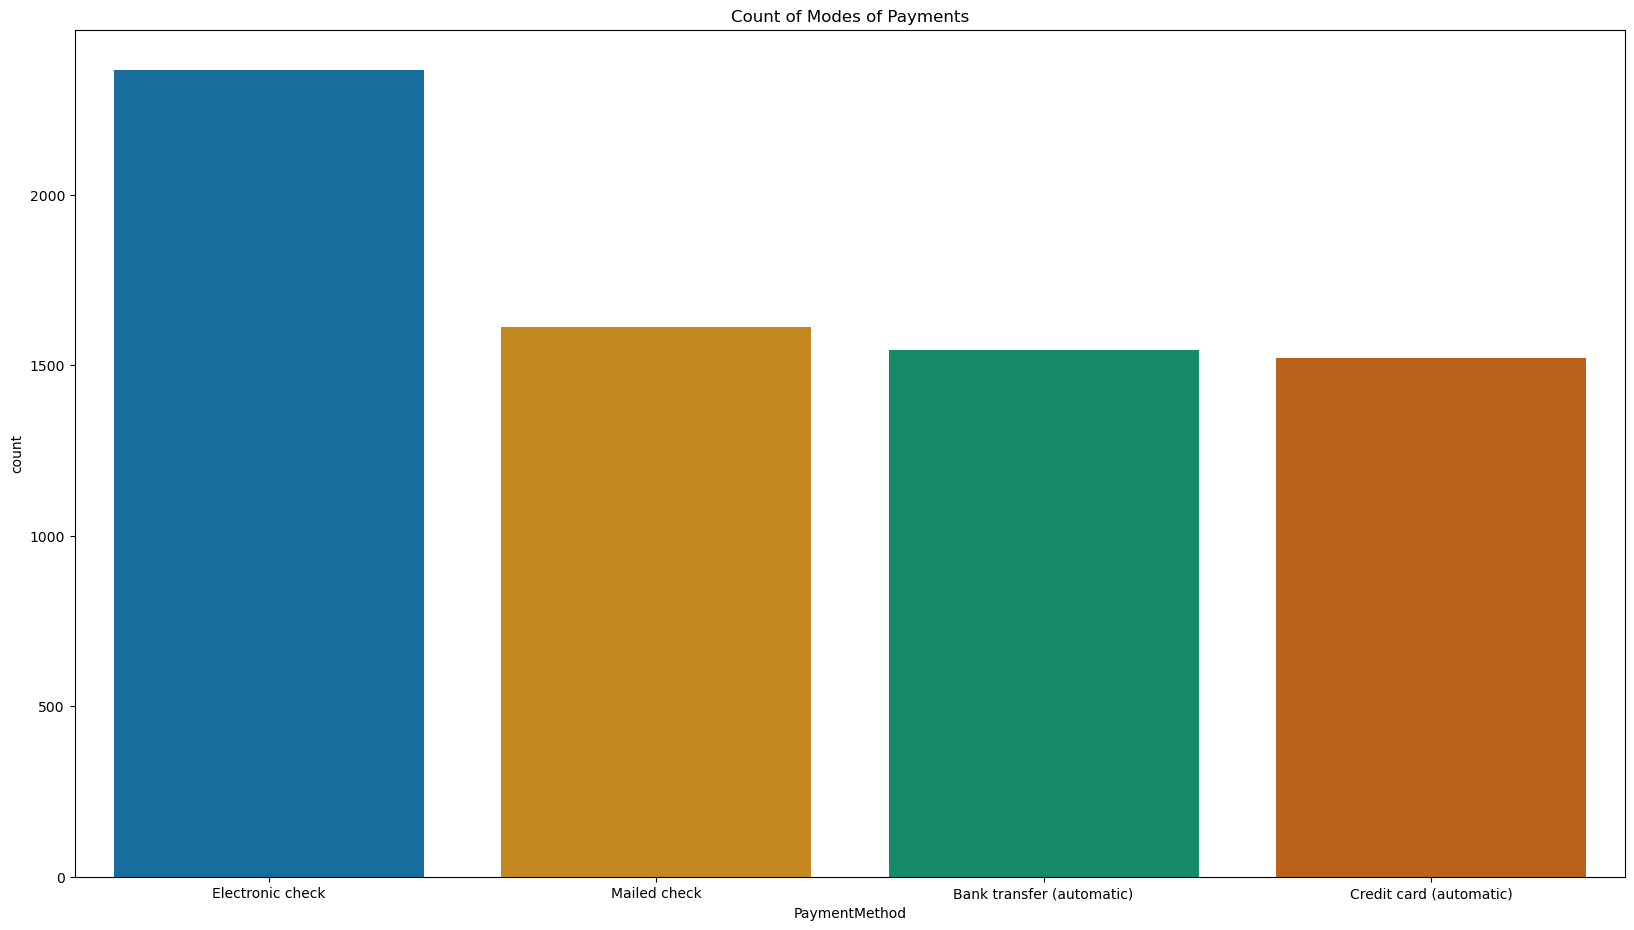

In [51]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x="PaymentMethod", data=df)
plt.title("Count of Modes of Payments")
plt.show()

Electronic Cheques being the most used mode of payment, this happens to be a very affective mode of payment as it takes a lower processing fee as compared to credit cards, we should our users to transfer their payments via this mode of payment over the others as they are much more safe and reliable. This can be achieved by providing better deals on costlier packs, maybe a discount coupon with the same or advance payments leading to lower prices for the packs.

Text(0.5, 1.0, 'Area wise Distribution in Locality')

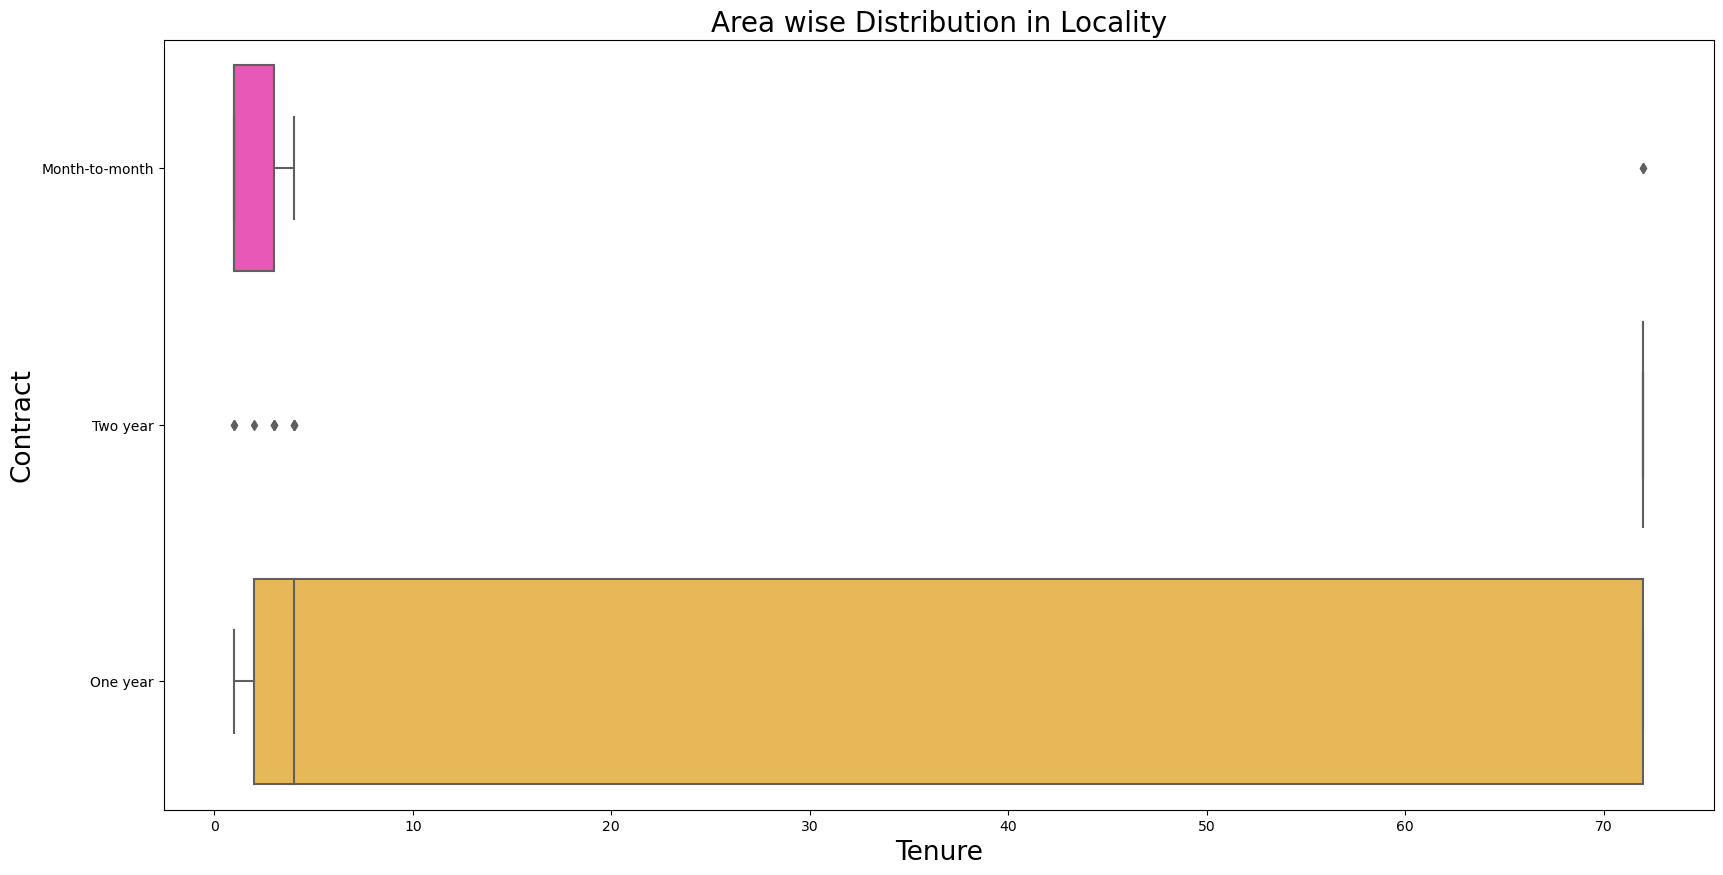

In [56]:
top_loc = df['tenure'].value_counts().head(5)
top_loc_name = top_loc.index
df_loc = df.loc[df['tenure'].isin(top_loc_name)& df['Contract']]
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'tenure' , y = 'Contract' , data = df_loc, palette='spring')
ax.set_xlabel(xlabel = 'Tenure', fontsize = 19)
ax.set_ylabel(ylabel = 'Contract', fontsize = 19)
plt.title('Area wise Distribution in Locality', fontsize = 20)

Majority of the contracts are 1 year contracts, which need to be changed, i.e., the comapny must work a lot on their CRM as the happier the customer the better they empty their pockets for our services :) . We must work on the conversion of all of them from one year to two year contracts, also, increase the costs of month to month contracts, because the customers in that segment are mostly experimentals who are ready to switch amongst several networks and are just trying out our networks. 
Maybe coming up with conversion chemes for all users can help us out in this, providing a added benefit to the converting customers or cooming up with loyalty programs to better serve the customers and capture more market segment.

# WORKING ON THE DATASET

In [7]:
df.dropna

<bound method DataFrame.dropna of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [8]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
list(df.select_dtypes(include='object').columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
cat_columns = list(df.select_dtypes(include='object').columns)

In [11]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
df[cat_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


# ONE HOT ENCODING

In [13]:
enc.fit(df[cat_columns])

OneHotEncoder()

In [14]:
enc.transform(df[cat_columns]).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [15]:
df_cat = pd.DataFrame(enc.transform(df[cat_columns]).toarray(), columns = enc.get_feature_names_out())

In [16]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
num_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

In [18]:
num_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [19]:
df_num = df[num_columns]

In [20]:
df_num

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


# Joining the Numerical and Categorical Columns

In [21]:
df2 = df_num.join(df_cat)

In [22]:
df2

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,34,56.95,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,45,42.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7040,0,11,29.60,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,4,74.40,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Label Encoding and setting up Y

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
le.fit(df['Churn'])

LabelEncoder()

In [25]:
le.transform(df['Churn'])

array([0, 0, 1, ..., 0, 1, 0])

In [26]:
y = le.transform(df['Churn'])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.4, random_state=10)

In [28]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
4020,1,72,64.95,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6145,0,67,54.20,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2646,0,56,81.80,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3643,0,53,19.05,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1258,0,47,20.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0,39,49.80,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3441,0,34,60.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1344,0,28,20.50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4623,1,69,95.35,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
x_test

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
6418,0,31,79.30,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1948,0,2,80.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4497,1,60,97.95,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66,0,47,78.90,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1705,1,55,90.45,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0,57,19.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2415,1,40,94.55,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4097,0,64,99.15,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1962,0,23,99.95,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

## Decision Tree

In [32]:
clf = DecisionTreeClassifier()

In [33]:
clf = clf.fit(df2, y)

In [34]:
clf = DecisionTreeClassifier(min_samples_split=500)

In [35]:
clf = clf.fit(x_train, y_train)

[Text(0.5, 0.75, 'X[6575] <= 0.5\ngini = 0.394\nsamples = 4225\nvalue = [3086, 1139]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1139\nvalue = [0, 1139]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3086\nvalue = [3086, 0]')]

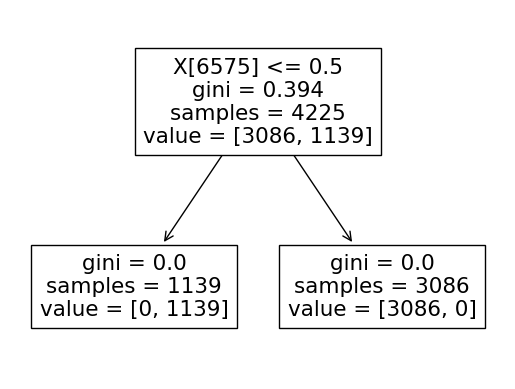

In [36]:
tree.plot_tree(clf)

###  Checking Testing and Training Accuracy 

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
train_predicitons = clf.predict(x_train)

In [39]:
accuracy_score(y_train, train_predicitons)

1.0

In [40]:
test_predicitons = clf.predict(x_test)

In [41]:
accuracy_score(y_test, test_predicitons)

1.0

### Confusion Matrix

In [42]:
cm = confusion_matrix(y_train, train_predicitons)

In [43]:
cm

array([[3086,    0],
       [   0, 1139]], dtype=int64)

<AxesSubplot:>

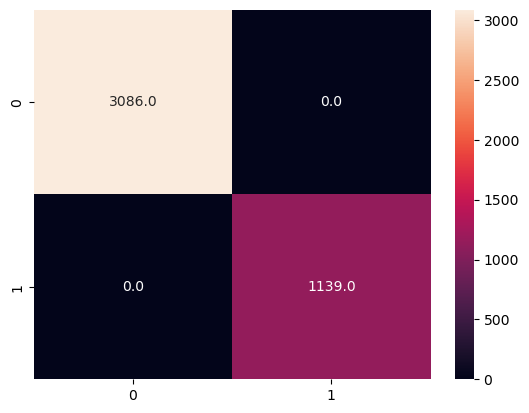

In [44]:
sns.heatmap(cm, annot=True, fmt=".1f")

#Testing Data

In [45]:
cm = confusion_matrix(y_test, test_predicitons)

<AxesSubplot:>

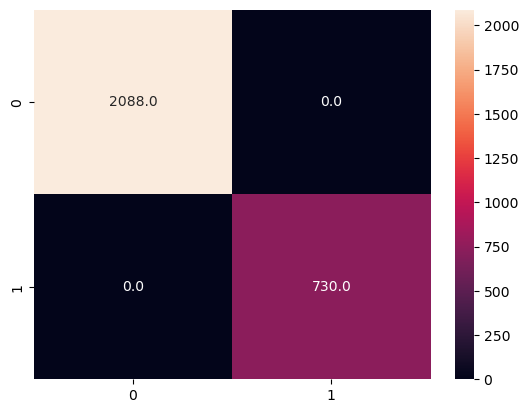

In [46]:
sns.heatmap(cm, annot=True, fmt=".1f")